In [10]:
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tarfile
import urllib.request

In [34]:
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit

In [5]:
def load_housing_data():
    
    data_path = Path("./datasets/housing.tgz") #create a path object
    if not data_path.is_file():   #check if the path is a file
        Path("./datasets").mkdir(parents=True, exist_ok=True)  # create directory datasets, and if exists do not raise any exception
        url = "https://github.com/ageron/data/raw/main/housing.tgz"
        urllib.request.urlretrieve(url, data_path) #download the file and save it in the data_path with the filename housing.tgz
        
        with tarfile.open(data_path) as housing_tarball_file:
            housing_tarball_file.extractall(path="./datasets")
            
        data_path.unlink() # delete the tarball file

    return pd.read_csv("./datasets/housing/housing.csv")
        
        

In [6]:
df = load_housing_data()

In [7]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [9]:
# looking into the categorical feature

df['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

<Axes: xlabel='ocean_proximity', ylabel='Count'>

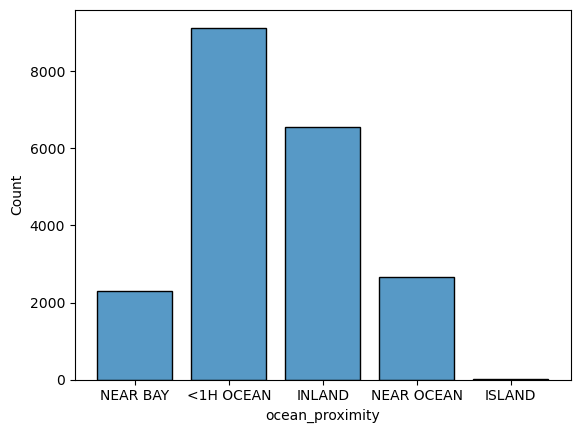

In [12]:
sns.histplot(df, x="ocean_proximity", shrink=0.8)

In [13]:
# looking in the continuous columns

df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


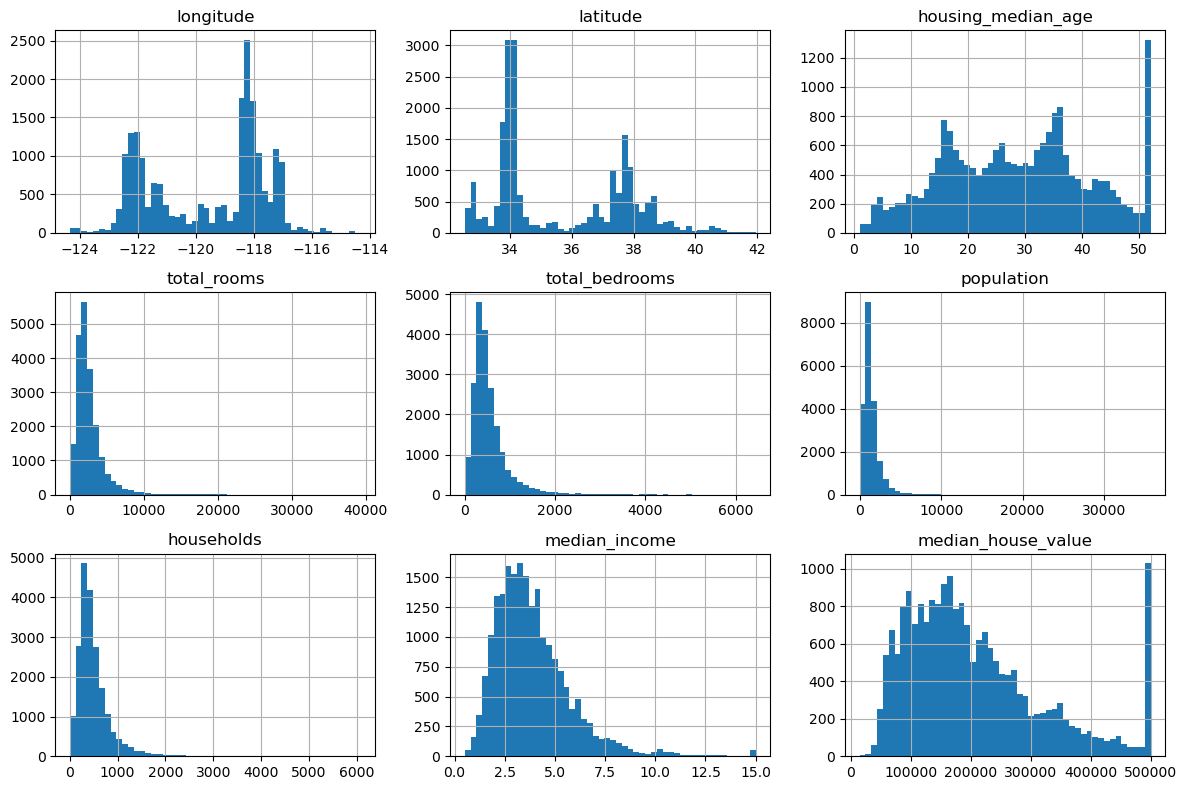

In [16]:
df.hist(bins=50, figsize=(12,8))
plt.tight_layout()

### Observations:

1. The median income is not expressed in US dollors.  These are scaled data and is capped at 15 for higer median and 0.5 for lower.
2. The housing median age and median house values were also capped.
3. right skewed dataset
4. attributes have different scales 

In [19]:
# train test split

train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)  # randoming sampling

We have been told that the median income is a very important feature to predict median housing price. We want to ensure the test set is representative of the various categories of income in the dataset.

In [20]:
df['median_income'].describe()

count    20640.000000
mean         3.870671
std          1.899822
min          0.499900
25%          2.563400
50%          3.534800
75%          4.743250
max         15.000100
Name: median_income, dtype: float64

If we look into the historam, the income is clustered between 1.5($15,000) to 6($60,000) and goes until 15. Lets stratifiy the dataset into multiple startum.

In [21]:
df['income_category'] = pd.cut(df['median_income'],
                               bins=[0.,1.5,3.0, 4.5, 6, np.inf],
                               labels = [1,2,3,4,5]
                              )

Text(0, 0.5, 'Count of district')

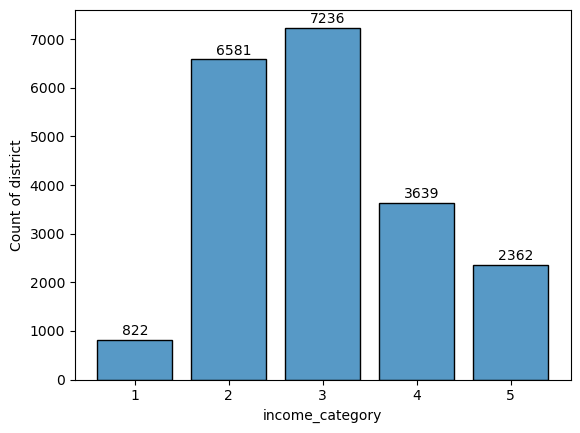

In [33]:
bars = sns.histplot(df, x="income_category", shrink=0.8)
for bar in bars.patches:
    height = bar.get_height()
    bar_left_edge_coordinate = bar.get_x()
    y = bar.get_width() / 3
    plt.text((bar_left_edge_coordinate + y), height + 100, height)
plt.ylabel('Count of district')

Now, we are ready to do stratified sampling based on the income category..

In [66]:
splitter = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42) #generate 10 different samples

In [67]:
# store stratified test and train set for each split samples
strat_splits = []

In [68]:
for train_index, test_index in splitter.split(df, df['income_category']): #stratifiy on column income_category
    strat_train_set_n = df.iloc[train_index]
    strat_test_set_n = df.iloc[test_index]
    strat_splits.append([strat_train_set_n,strat_test_set_n])

In [90]:
# simple approach to stratify sampling based on a particular column
strat_train_set, start_test_set = train_test_split(df, test_size=0.2, stratify=df['income_category'], random_state=42)

In [92]:
# % of distribution in each catgeory
income_dist_stratify = start_test_set['income_category'].value_counts().sort_index()/len(start_test_set) * 100

Text(0.5, 1.0, 'Median Income distribution after stratified sampling')

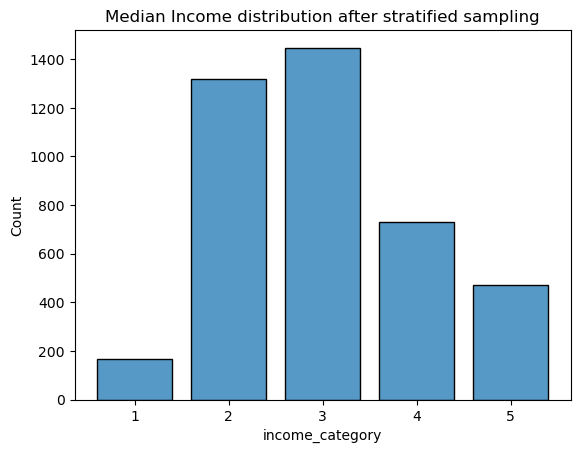

In [93]:
sns.histplot(start_test_set, x="income_category", shrink=0.8)
plt.title('Median Income distribution after stratified sampling')

## let us look at percentage distribution when using random sampling

In [94]:
train_set_rand, test_set_rand = train_test_split(df, test_size=0.2, random_state=42)

In [95]:
income_dist_random = test_set_rand['income_category'].value_counts().sort_index()/len(test_set_rand) * 100

In [96]:
income_dist_overall = df['income_category'].value_counts().sort_index()/len(df) * 100

In [99]:
pd.DataFrame([income_dist_random, income_dist_stratify, income_dist_overall], index=['Random Sample', 'Stratify sample', 'overall']).T

,Random Sample,Stratify sample,overall
income_category,,,
1,4.239341,3.997093,3.982558
2,30.741279,31.879845,31.884690
3,34.520349,35.053295,35.058140
4,18.410853,17.635659,17.630814
5,12.088178,11.434109,11.443798


As we can see, our stratified test set is preety much close to overall distribution

## Explore and visualise the data to gain insights

In [102]:
dft.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'income_category'],
      dtype='object')

In [101]:
dft = train_set_rand.copy()  #making a copy of stratified train set

In [130]:
pop_size = dft['population']/100

<Axes: xlabel='longitude', ylabel='latitude'>

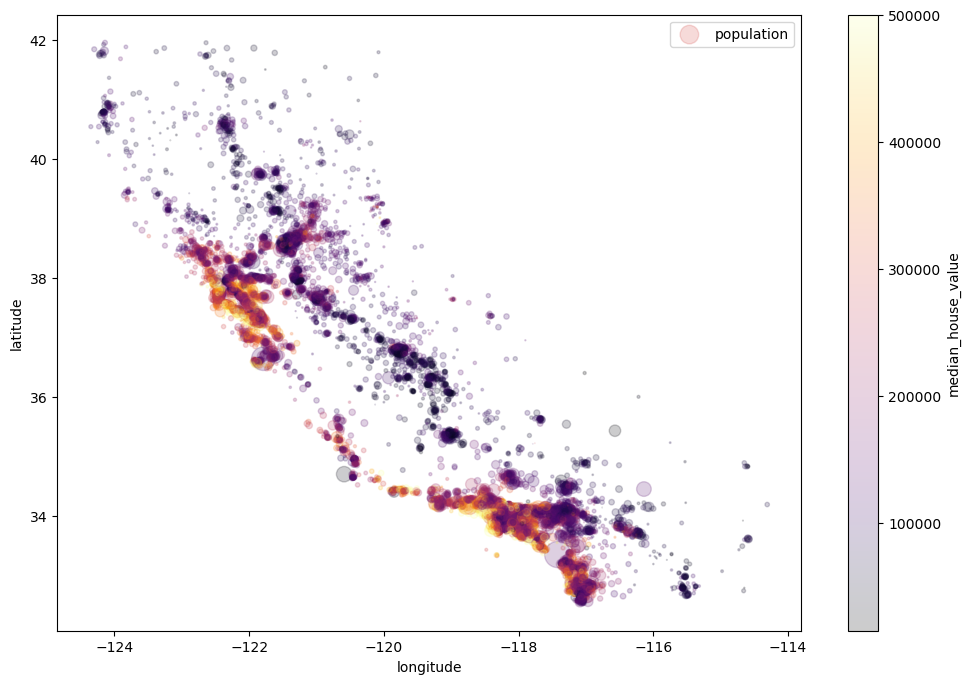

In [166]:
dft.plot(kind="scatter", x="longitude", y="latitude" ,s=pop_size, alpha=0.2 ,label="population", c="median_house_value", cmap="inferno", colorbar=True, sharex=False ,figsize=(12,8))

We can see that the population is concentrated into the bay area

## looking for correlation

In [149]:
corr = dft.select_dtypes(include="number").corr()

In [155]:
corr = corr['median_house_value']

In [173]:
features = corr.sort_values(ascending=False)[:4].index  #selecting highly correlated features

In [159]:
from pandas.plotting import scatter_matrix

array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>,
        <Axes: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>,
        <Axes: xlabel='housing_median_age', ylabel='median_income'>],
       [<Axes: xlabel='median_house_value', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<Axes: xlabel='median_house_value', ylabel='housing_median_age'>,
        <Axes: xlabel='median_income', ylabel='housing_median_age'>,
        <Axes: xlabel='total_rooms', ylabel='housi

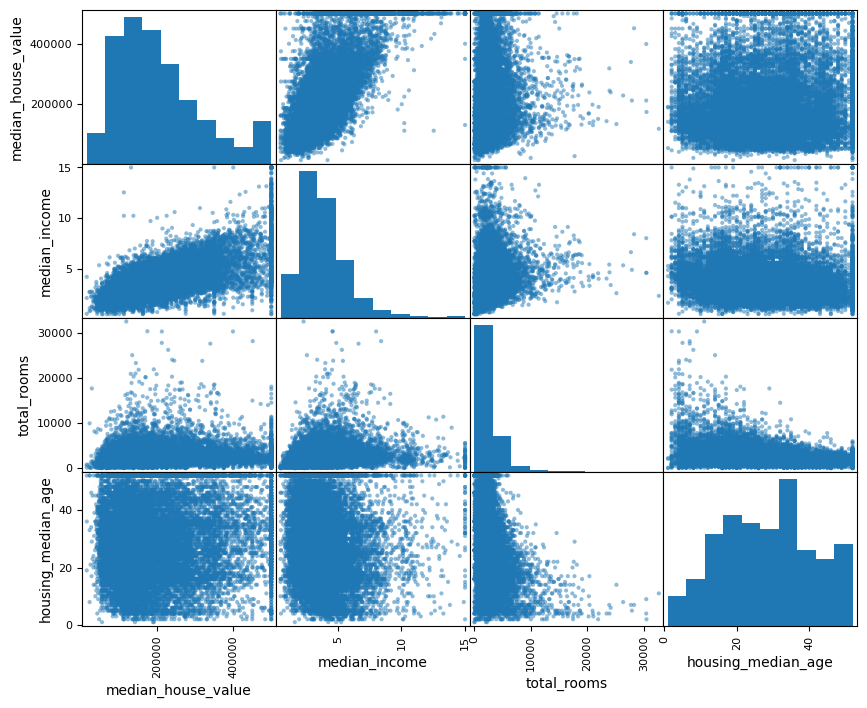

In [175]:
scatter_matrix(dft[features], figsize=(10,8))

## We can see that the most promising feature to predict median_house_price is median_income

Lets zoom in

<Axes: xlabel='median_income', ylabel='median_house_value'>

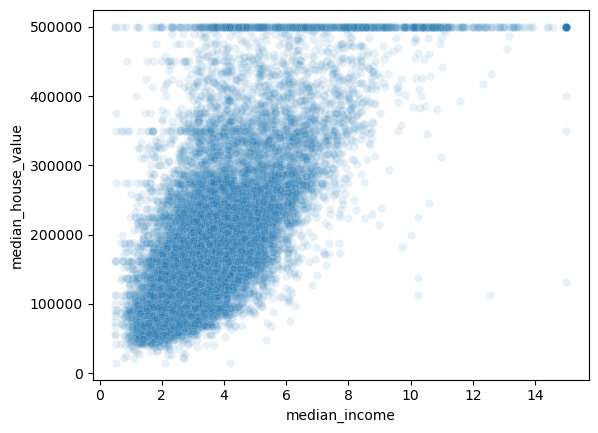

In [180]:
sns.scatterplot(dft, x="median_income", y="median_house_value",alpha=0.1)

We can notice that the correlation is quiet strong. But, there is st line phenomenan arounf 450k, 350k, 275k, 150k.

We might want to remove these values so that model do not pick up these.

In [181]:
dft.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'income_category'],
      dtype='object')

In [182]:
dft['avg_rooms_per_house'] = dft['total_bedrooms']/dft['households']

In [183]:
dft['bedrooms_ratio'] = dft['total_bedrooms']/dft['total_rooms']

In [184]:
dft['people_per_house'] = dft['population'] / dft['households']

In [187]:
corr = dft.select_dtypes(include="number").corr()

In [190]:
corr['median_house_value'].sort_values()

bedrooms_ratio        -0.254817
latitude              -0.146324
longitude             -0.043603
avg_rooms_per_house   -0.043182
population            -0.025820
people_per_house      -0.021577
total_bedrooms         0.049993
households             0.065798
housing_median_age     0.104714
total_rooms            0.134060
median_income          0.687013
median_house_value     1.000000
Name: median_house_value, dtype: float64